In [10]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy as np
from sklearn.svm import SVC
import matplotlib.pyplot as plt
# Load your data (replace 'your_data.csv' with your actual file)

data = pd.read_csv('sorted_insider_trading_data.csv')
numeric_data = data.select_dtypes(exclude='object')
#column_to_drop = "TYPE OF SECURITY (ACQUIRED/DISPLOSED)"
#numeric_data = numeric_data.drop(column_to_drop, axis=1)
#numeric_data=numeric_data.drop("TYPE OF SECURITY (ACQUIRED/DISPLOSED) \r\n",axis=1)



In [11]:
print(data)

      SYMBOL \n               NAME OF THE ACQUIRER/DISPOSER \n  \
0      CHOICEIN                                Manoj Singhania   
1      CHOICEIN                                  Karishma Shah   
2      CHOICEIN                                   Ayush Sharma   
3      CHOICEIN                           Bhal Chandra Murarka   
4      CHOICEIN                                  Yogesh Jadhav   
..          ...                                            ...   
504  JAYNECOIND           JAYASWAL NECO ENERGY PRIVATE LIMITED   
505  JAYNECOIND  JAYASWAL NECO INFRASTRUCTURES PRIVATE LIMITED   
506  JAYNECOIND            JAYASWAL NECO POWER PRIVATE LIMITED   
507  JAYNECOIND                                  RITA JAYASWAL   
508  JAYNECOIND              JAYASWAL HOLDINGS PRIVATE LIMITED   

    CATEGORY OF PERSON \n TYPE OF SECURITY (PRIOR) \n  \
0                       -               Equity Shares   
1                       -               Equity Shares   
2                       -           

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 509 entries, 0 to 508
Data columns (total 13 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   SYMBOL 
                                     509 non-null    object 
 1   NAME OF THE ACQUIRER/DISPOSER 
              509 non-null    object 
 2   CATEGORY OF PERSON 
                         509 non-null    object 
 3   TYPE OF SECURITY (PRIOR) 
                   509 non-null    object 
 4   % SHAREHOLDING (PRIOR) 
                     509 non-null    float64
 5   NO. OF SECURITIES (ACQUIRED/DISPLOSED) 
     119 non-null    float64
 6   VALUE OF SECURITY (ACQUIRED/DISPLOSED) 
     119 non-null    float64
 7   ACQUISITION/DISPOSAL TRANSACTION TYPE 
      509 non-null    object 
 8   NO. OF SECURITY (POST) 
                     509 non-null    object 
 9   DATE OF ALLOTMENT/ACQUISITION FROM 
         509 non-null    object 
 10  MO

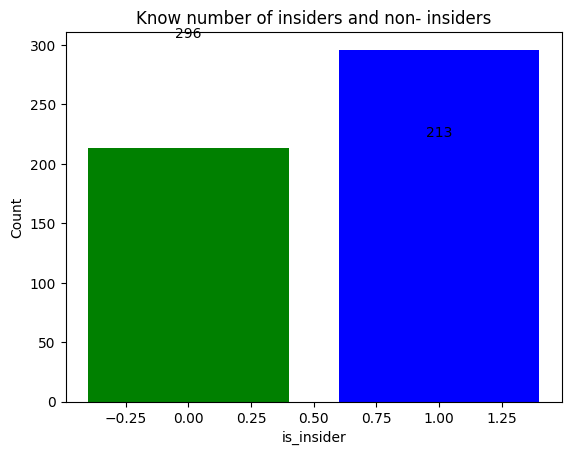

In [13]:
# Count the occurrences of each value in the binary column
value_counts = data['is_insider'].value_counts()

# Create a bar plot
plt.bar(value_counts.index, value_counts.values, color=['blue', 'green'])

# Add labels and title
plt.xlabel('is_insider')
plt.ylabel('Count')
plt.title('Know number of insiders and non- insiders')

# Add value labels on top of each bar
for i, v in enumerate(value_counts.values):
    plt.text(i, v + 10, str(v), ha='center')

# Show the plot
plt.show()

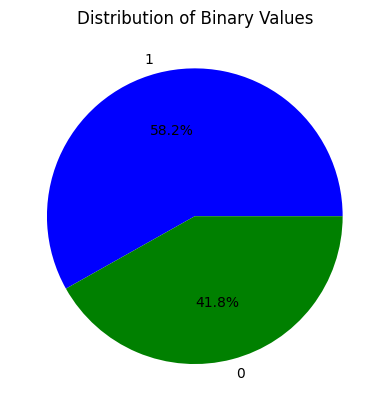

In [14]:
# Create a pie chart
plt.pie(value_counts.values, labels=value_counts.index, autopct='%1.1f%%', colors=['blue', 'green'])

# Add title
plt.title('Distribution of Binary Values')

# Show the plot
plt.show()


In [15]:
values=numeric_data.drop("is_insider",axis=1)
labels=numeric_data["is_insider"]
values=values.fillna(values.mean())

In [16]:
scaler = StandardScaler()
values= scaler.fit_transform(values)
values


array([[-1.24427887e-01, -1.81375866e-16,  8.24178668e-17,
         0.00000000e+00],
       [-1.15332995e-01, -1.81375866e-16,  8.24178668e-17,
         0.00000000e+00],
       [-1.15332995e-01, -1.81375866e-16,  8.24178668e-17,
         0.00000000e+00],
       ...,
       [ 1.04274989e+00, -1.81375866e-16,  8.24178668e-17,
         0.00000000e+00],
       [-1.24427887e-01, -1.81375866e-16,  8.24178668e-17,
         0.00000000e+00],
       [ 1.53387404e+00, -1.81375866e-16,  8.24178668e-17,
         0.00000000e+00]])

In [17]:
X_train, X_test, y_train, y_test = train_test_split(values, labels, test_size=0.2, random_state=42)

# Define and train the SVM model
svm_model = SVC(kernel='linear')  # Linear kernel for initial exploration
svm_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = svm_model.predict(X_test)

# Evaluate the model (using metrics from previous example)
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

accuracy = accuracy_score(y_test, y_pred)
confusion_matrix_result = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", confusion_matrix_result)
print("Classification Report:\n", classification_report(y_test, y_pred))

# Grid search for hyperparameter tuning (optional, but recommended for best performance)
from sklearn.model_selection import GridSearchCV

param_grid = {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf']}
grid_search = GridSearchCV(svm_model, param_grid, cv=5)  # 5-fold cross-validation
grid_search.fit(X_train, y_train)

# Print the best parameters found
print("Best Parameters:", grid_search.best_params_)
print(accuracy)

Confusion Matrix:
 [[14 26]
 [ 1 61]]
Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.35      0.51        40
           1       0.70      0.98      0.82        62

    accuracy                           0.74       102
   macro avg       0.82      0.67      0.66       102
weighted avg       0.79      0.74      0.70       102

Best Parameters: {'C': 10, 'kernel': 'rbf'}
0.7352941176470589


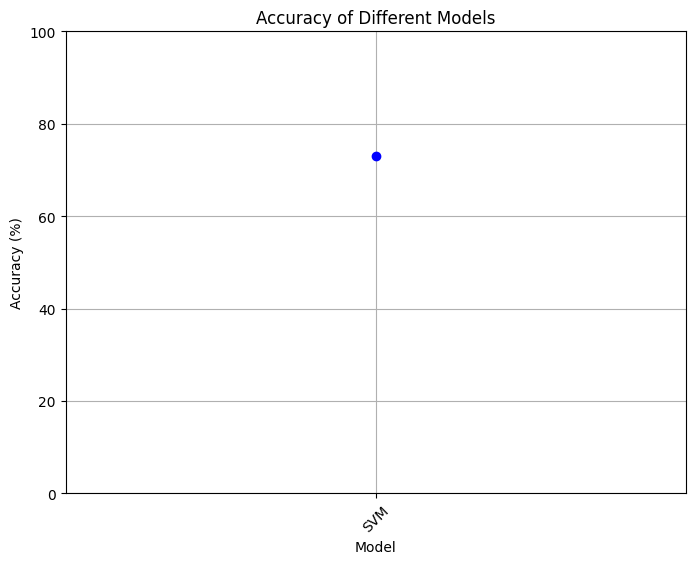

In [21]:


# Define model names and their corresponding accuracies
models = ['SVM']  # Replace with names of your models
accuracies = [73]  # Replace with corresponding accuracy values

# Plotting accuracy
plt.figure(figsize=(8, 6))
plt.plot(models, accuracies, marker='o', color='blue', linestyle='-')
plt.xlabel('Model')
plt.ylabel('Accuracy (%)')
plt.title('Accuracy of Different Models')
plt.grid(True)
plt.ylim(0, 100)
plt.xticks(rotation=45)
plt.show()


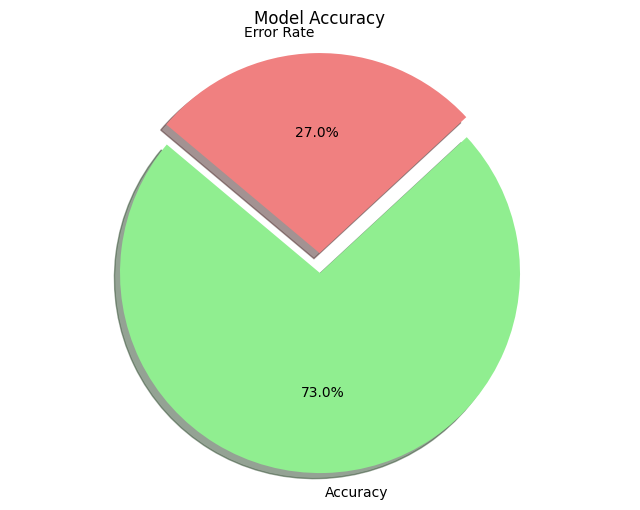

In [22]:


# Define accuracy and error rate
accuracy = 73
error_rate = 100 - accuracy

# Define labels and sizes for the pie chart
labels = ['Accuracy', 'Error Rate']
sizes = [accuracy, error_rate]
colors = ['lightgreen', 'lightcoral']
explode = (0.1, 0)  # Explode the "Accuracy" slice

# Create pie chart
plt.figure(figsize=(8, 6))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
plt.title('Model Accuracy')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.show()
